In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWivSkG7K3BY_3irQlgPNIJT35jiJDVcoPkR0IjRcNMLlsfXgl5ZLWU
Mounted at /content/drive


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/My_Colab_Notebook/Pattern Recognition/Assignments/assignment-2/train-perceptron.txt', sep=" " , header = None, dtype = 'float64')
train_dataset

,0,1,2
0,1.0,1.0,1.0
1,1.0,-1.0,1.0
2,2.0,2.5,2.0
3,0.0,2.0,2.0
4,2.0,3.0,2.0
5,4.0,5.0,1.0


In [ ]:
train_dataset = np.array(train_dataset)
list1 = []
list2 = []
for i in train_dataset:
    if i[2] == 1.0:
        list1.append(i)
    else:
        list2.append(i)
list1 = np.array(list1)
list2 = np.array(list2)
train_dataset = np.row_stack((list1,list2))
train_dataset

array([[ 1. ,  1. ,  1. ],
       [ 1. , -1. ,  1. ],
       [ 4. ,  5. ,  1. ],
       [ 2. ,  2.5,  2. ],
       [ 0. ,  2. ,  2. ],
       [ 2. ,  3. ,  2. ]])

In [ ]:
function = np.ones([6,6])
function[:,0] = train_dataset[:,0] * train_dataset[:,0]
function[:,1] = train_dataset[:,1] * train_dataset[:,1]
function[:,2] = train_dataset[:,0] * train_dataset[:,1]
function[:,3] = train_dataset[:,0]
function[:,4] = train_dataset[:,1]
#normalizing
function[3:6,:] = function[3:6,:] * -1
function

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [ ]:
learning_rate = np.arange(0.1,1.1, 0.1)  
learning_rate

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
all_zero = np.array([[0,0,0,0,0,0]])
all_one = np.array([[1,1,1,1,1,1]])

In [ ]:
rndm = []
r = []
for i in range(6):
    random.seed(10)
    r.append(random.randint(1,3))
rndm.append(r)
rndm = np.array(rndm)
rndm



array([[1, 2, 2, 3, 1, 1]])

In [36]:
c = 0
count_iteration_for_all_zero_manyAtaTime = []
for i in learning_rate:
  a = all_zero
  a = np.array(a)
  c = 0
  while True:
    update_wt = []
    temp = []
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        # if missclassified
        if s[0]<= 0:
          temp.append(j)
          b = 1
    c = c + 1
    #if no miss classifies found,=>break
    if b == 0:
      break            
    e = np.array(temp)
    update_wt.append(np.sum(e, axis = 0))
    update_wt = np.array(update_wt)
    update_wt = a + (update_wt * i)
    a = update_wt
  count_iteration_for_all_zero_manyAtaTime.append(c)  
  
        

In [ ]:
c = 0
count_iteration_for_all_one_manyAtaTime = []
for i in learning_rate:
  a = all_one
  a = np.array(a)
  c = 0
  while True:
    update_wt = []
    temp = []
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          temp.append(j)
          b = 1
    c = c + 1    
    if b == 0:
      break            
    e = np.array(temp)
    update_wt.append(np.sum(e, axis = 0))
    update_wt = np.array(update_wt)
    update_wt = a + (update_wt * i)
    a = update_wt
  count_iteration_for_all_one_manyAtaTime.append(c)  

In [ ]:
c = 0
count_iteration_for_randm_manyAtaTime = []
for i in learning_rate:
  a = rndm
  a = np.array(a)
  c = 0
  while True:
    update_wt = []
    temp = []
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          temp.append(j)
          b = 1
    c = c + 1     
    if b == 0:
      break            
    e = np.array(temp)
    update_wt.append(np.sum(e, axis = 0))
    update_wt = np.array(update_wt)
    update_wt = a + (update_wt * i)
    a = update_wt
  count_iteration_for_randm_manyAtaTime.append(c)  

In [ ]:
c = 0
count_iteration_for_all_zero_oneAtaTime = []
for i in learning_rate:
  a = all_zero
  a = np.array(a)
  c = 0
  while True:
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1
    if b == 0:
      break            
    
  count_iteration_for_all_zero_oneAtaTime.append(c)  

In [ ]:
c = 0
count_iteration_for_all_one_oneAtaTime = []
for i in learning_rate:
  a = all_one
  a = np.array(a)
  c = 0
  while True:
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1 
    if b == 0:
      break               
  count_iteration_for_all_one_oneAtaTime.append(c)  

In [ ]:
c = 0
count_iteration_for_random_oneAtaTime = []
for i in learning_rate:
  a = rndm
  a = np.array(a)
  c = 0
  while True:
    b = 0
    for j in function:
        s = np.sum(j * a,axis = 1)
        if s[0]<= 0:
          a = a + (j * i)
          b = 1
    c = c + 1    
    if b == 0:
      break              
  count_iteration_for_random_oneAtaTime.append(c)  

In [ ]:
lx1=list1[:,0]
lx2=list1[:,1]
lxx1=list2[:,0]
lxx2=list2[:,1]

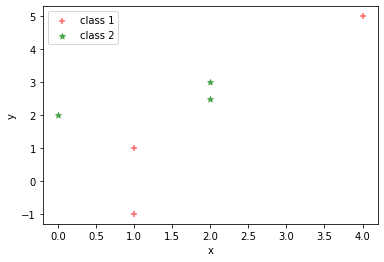

In [ ]:
plt.scatter(lx1,lx2, color = 'r',marker = "+", alpha = 0.6,  label = 'class 1')
plt.scatter(lxx1,lxx2, color = 'g',marker = "*", alpha = 0.6,  label = 'class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
dict = {'Learning rate(ALL Zero)' : learning_rate,
        'One at a time' : count_iteration_for_all_zero_oneAtaTime, 
        'Many at a time' :count_iteration_for_all_zero_manyAtaTime }
df = pd.DataFrame(dict) 
df


,Learning rate(ALL Zero),One at a time,Many at a time
0,0.1,94,105
1,0.2,94,105
2,0.3,94,92
3,0.4,94,105
4,0.5,94,92
5,0.6,94,105
6,0.7,94,105
7,0.8,94,105
8,0.9,94,105
9,1.0,94,92


In [ ]:
dict = {'Learning rate(All one)' : learning_rate,
        'One at a time' : count_iteration_for_all_one_oneAtaTime, 
        'Many at a time' :count_iteration_for_all_one_manyAtaTime} 
df = pd.DataFrame(dict) 
df

,Learning rate(All one),One at a time,Many at a time
0,0.1,6,102
1,0.2,92,104
2,0.3,104,91
3,0.4,106,116
4,0.5,93,105
5,0.6,93,114
6,0.7,108,91
7,0.8,115,91
8,0.9,94,105
9,1.0,94,93


In [ ]:
dict = {'Learning rate(Random)' : learning_rate,
        'One at a time' : count_iteration_for_random_oneAtaTime, 
        'Many at a time' :count_iteration_for_randm_manyAtaTime} 
df = pd.DataFrame(dict) 
df

,Learning rate(Random),One at a time,Many at a time
0,0.1,20,94
1,0.2,101,85
2,0.3,6,101
3,0.4,98,113
4,0.5,97,102
5,0.6,92,104
6,0.7,104,90
7,0.8,97,114
8,0.9,104,91
9,1.0,93,104


Text(0, 0.5, 'No. of iteration')

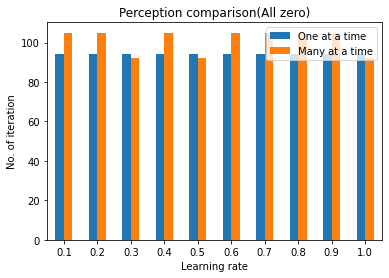

In [ ]:
one_at_time_all_zero = count_iteration_for_all_zero_oneAtaTime
many_at_a_time_all_zero = count_iteration_for_all_zero_manyAtaTime
index = ['0.1', '0.2', '0.3',
         '0.4', '0.5', '0.6', '0.7','0.8','0.9','1.0']
df = pd.DataFrame({'One at a time': one_at_time_all_zero,
                   'Many at a time': many_at_a_time_all_zero}, index=index)
ax = df.plot.bar(rot=0)
ax.set_title("Perception comparison(All zero)")
ax.set_xlabel("Learning rate")
ax.set_ylabel("No. of iteration")

Text(0, 0.5, 'No. of iteration')

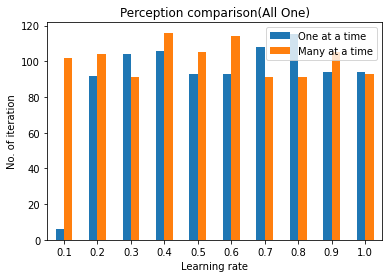

In [ ]:
one_at_time_all_one = count_iteration_for_all_one_oneAtaTime
many_at_a_time_all_one = count_iteration_for_all_one_manyAtaTime
index = ['0.1', '0.2', '0.3',
         '0.4', '0.5', '0.6', '0.7','0.8','0.9','1.0']
df = pd.DataFrame({'One at a time': one_at_time_all_one,
                   'Many at a time': many_at_a_time_all_one}, index=index)
ax = df.plot.bar(rot=0)
ax.set_title("Perception comparison(All One)")
ax.set_xlabel("Learning rate")
ax.set_ylabel("No. of iteration")

Text(0, 0.5, 'No. of iteration')

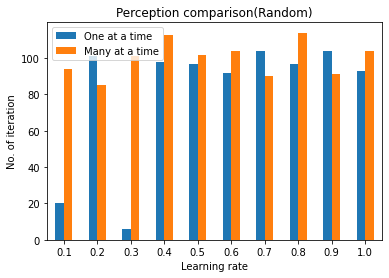

In [ ]:
one_at_time_random = count_iteration_for_random_oneAtaTime
many_at_a_time_random = count_iteration_for_randm_manyAtaTime
index = ['0.1', '0.2', '0.3',
         '0.4', '0.5', '0.6', '0.7','0.8','0.9','1.0']
df = pd.DataFrame({'One at a time': one_at_time_random,
                   'Many at a time': many_at_a_time_random}, index=index)
ax = df.plot.bar(rot=0)
ax.set_title("Perception comparison(Random)")
ax.set_xlabel("Learning rate")
ax.set_ylabel("No. of iteration")
